In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.drop('car_ID', axis=1, inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
df_numeric.columns.size

15

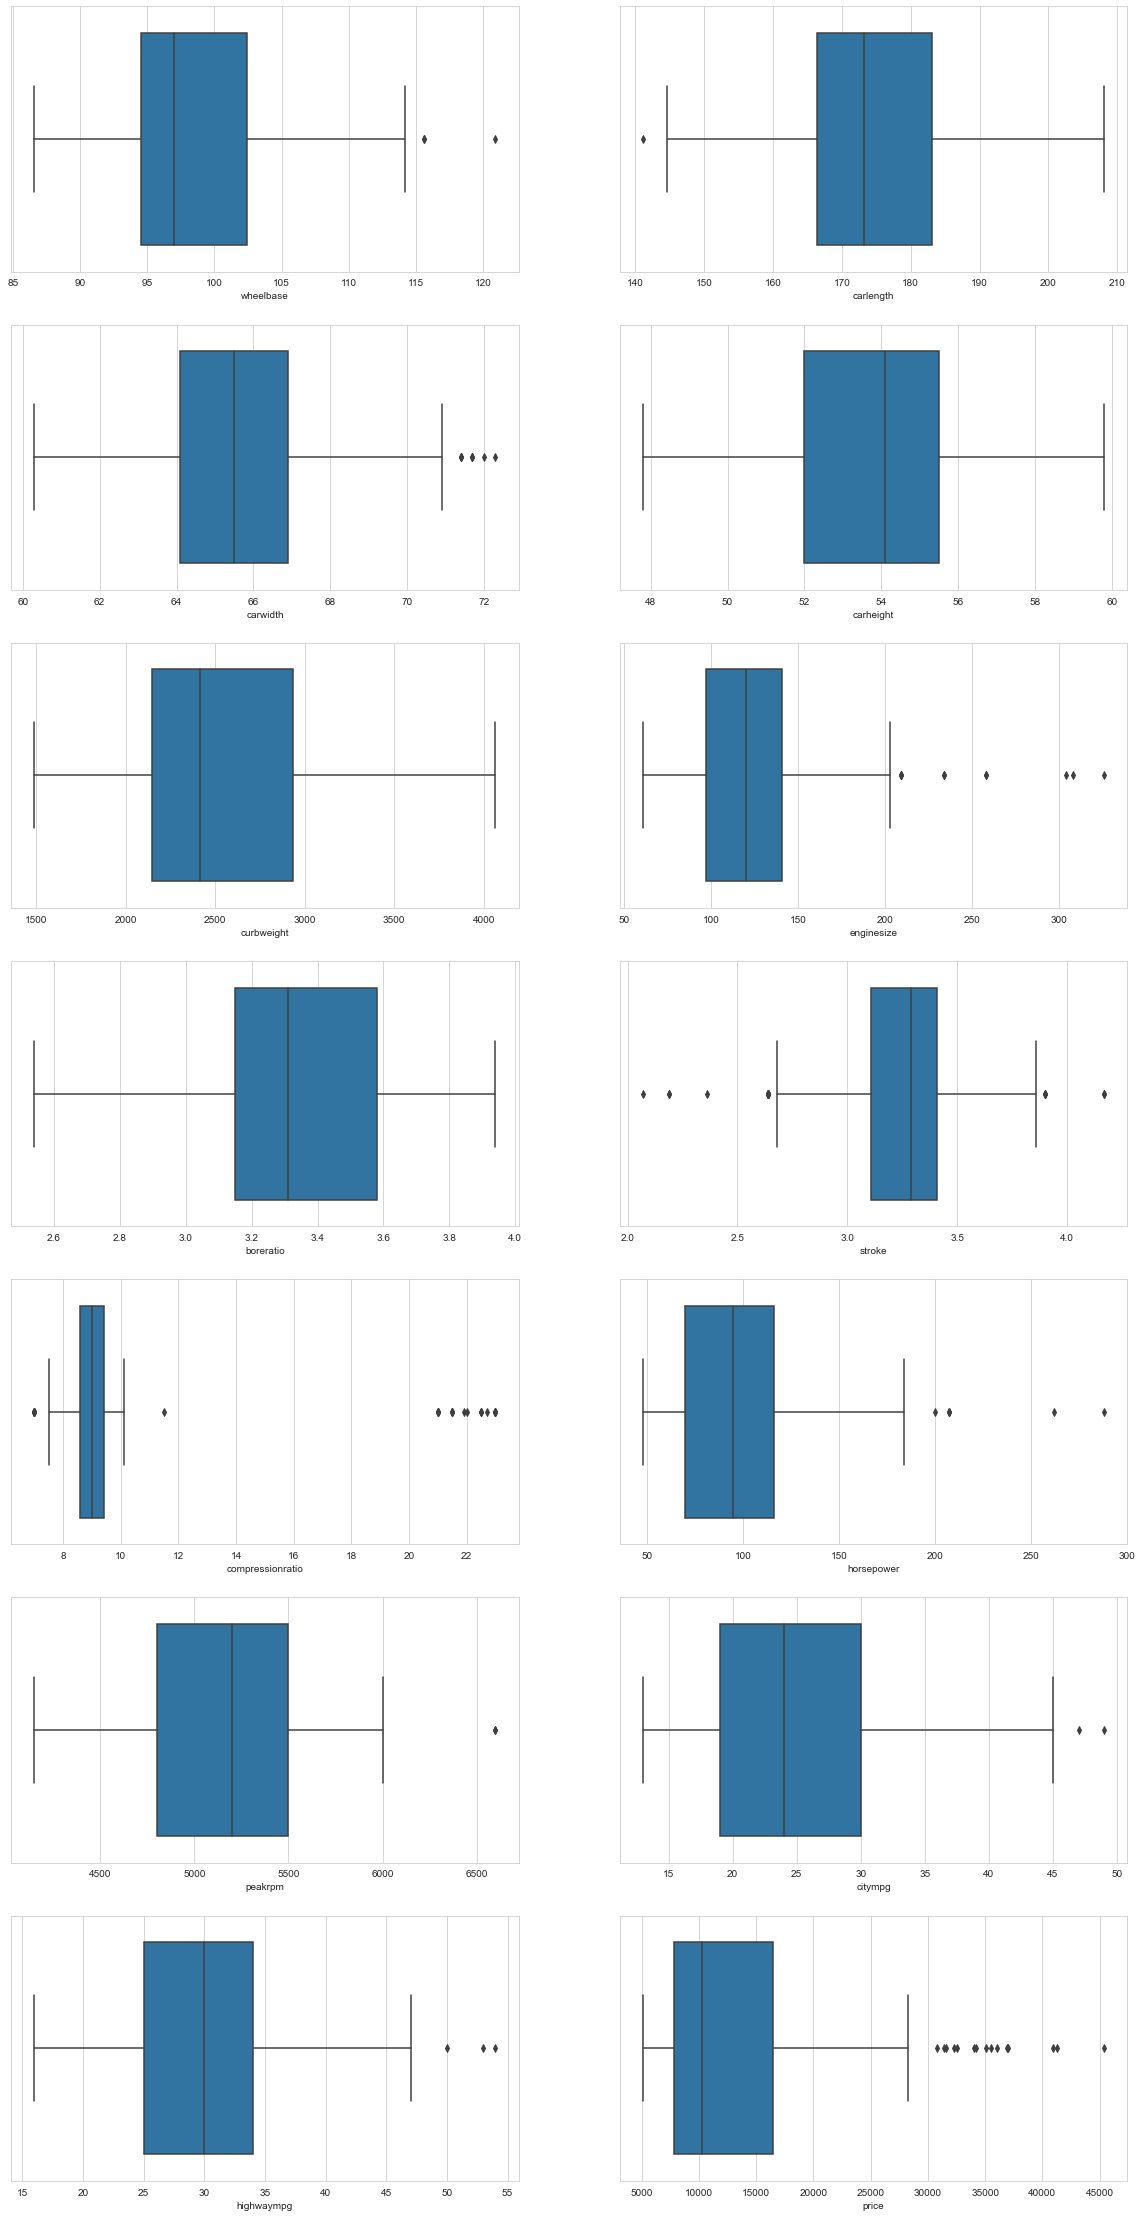

In [21]:
fig = plt.figure(figsize=(20, 5*round(df_numeric.columns.size/2,0)))

for i in range(1,df_numeric.columns.size):
    plt.subplot(int(df_numeric.columns.size/2), 2, i)
    sns.boxplot(data=df_numeric, x=df_numeric.columns[i])

# Interquartile Range

In [30]:
def out_iqr(df, column):
    q25 = df[column].quantile(0.25)
    q75 = df[column].quantile(0.75)

    iqr = q75 - q25

    cut_off = iqr * 1.5

    lower = q25 - cut_off
    upper = q75 + cut_off
    print(f'IQR: {iqr}')
    print(f'Lower limit is {lower}')
    print(f'Upper limit is {upper}')

    df = df[df[column]>lower]
    df = df[df[column]<upper]
    return df

In [32]:
df_numeric = out_iqr(df_numeric, 'price')

IQR: 8715.0
Lower limit is -5284.5
Upper limit is 29575.5


<AxesSubplot:xlabel='price'>

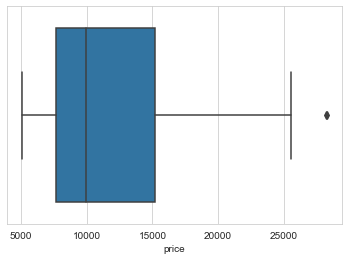

In [34]:
sns.boxplot(data=df_numeric, x='price')

In [47]:
def out_iqr(df, column):
    q25 = df[column].quantile(0.25)
    q75 = df[column].quantile(0.75)

    iqr = q75 - q25

    cut_off = iqr * 2

    lower = q25 - cut_off
    upper = q75 + cut_off
    print(f'IQR: {iqr}')
    print(f'Lower limit is {lower}')
    print(f'Upper limit is {upper}')

    fig = plt.figure(figsize=(10,6))
    sns.distplot(df[column], kde=False)
    plt.axvspan(xmin=lower, xmax=df[column].min(), alpha=0.2, color='red')
    plt.axvspan(xmin=upper, xmax=df[column].max(), alpha=0.2, color='red')


    df = df[df[column]>lower]
    df = df[df[column]<upper]
    return df

IQR: 0.7000000000000011
Lower limit is 7.649999999999998
Upper limit is 10.450000000000003


C:\Users\Hp Envy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


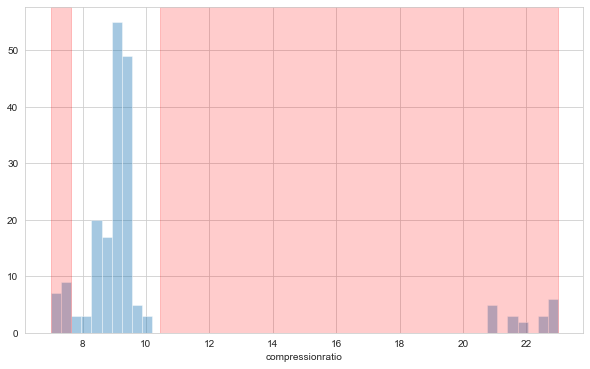

In [50]:
df_numeric = out_iqr(df_numeric, 'compressionratio')

<AxesSubplot:xlabel='compressionratio'>

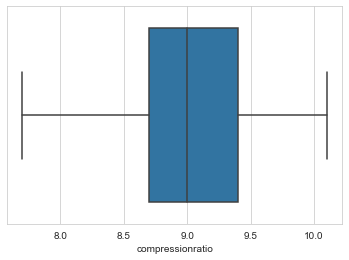

In [52]:
sns.boxplot(data=df_numeric, x='compressionratio')